<h1> Random Forest Project </h1>
</br>


<b>For this project we will be exploring publicly available data from LendingClub.com. Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.</b>

We will use Lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full.

<h2> Import Libraries </h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<h2> Get the Data </h2>

<b> Use pandas to read loan_csv as a dataframe called loans.</b>

In [2]:
loans = pd.read_csv("loan_data.csv")

<b> Check out the info(), head(), and describe(), methods on loan.</b>

In [3]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
loans.head(4)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0


In [5]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


<h2> Exploratory Data Analysis </h2>

<b> Let's do some data visualization! We'll use seaborn and pandas built-in plotting capabilities, but feel free to use whatever library you want. Don't worry about the color matching, just worry about getting the main idea of the plot.</b>

<b> Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.</b>

Text(0.5, 0, 'FICO')

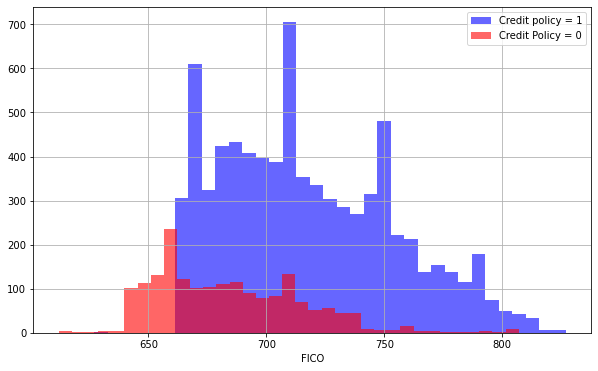

In [6]:
plt.figure(figsize=(10,6))
loans[loans["credit.policy"]==1]["fico"].hist(bins=35, color="blue", label="Credit policy = 1", alpha=0.6)
loans[loans["credit.policy"]==0]["fico"].hist(bins=35, color="red", label="Credit Policy = 0", alpha=0.6)
plt.legend()
plt.xlabel("FICO")

<b> Create a similar figure, except this time select by the not.fully.paid column. </b>

Text(0.5, 0, 'FICO')

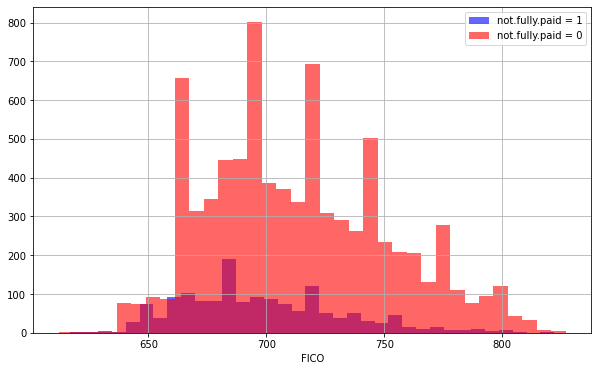

In [7]:
plt.figure(figsize=(10,6))
loans[loans["not.fully.paid"]==1]["fico"].hist(bins=35, color="blue", label="not.fully.paid = 1", alpha=0.6)
loans[loans["not.fully.paid"]==0]["fico"].hist(bins=35, color="red", label="not.fully.paid = 0", alpha=0.6)
plt.legend()
plt.xlabel("FICO")

<b> Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid</b>

<AxesSubplot:xlabel='purpose', ylabel='count'>

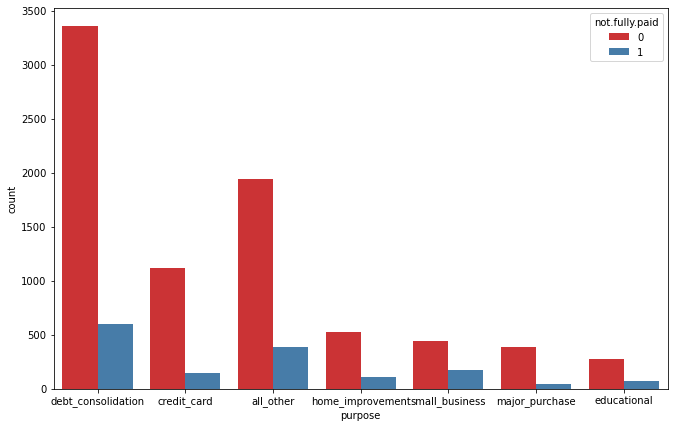

In [8]:
plt.figure(figsize=(11,7))
sns.countplot(x =loans["purpose"], hue=loans["not.fully.paid"], palette="Set1")

<b> Let's see the trend between FICO score and interest rate. Recreate the following jointplot.</b>

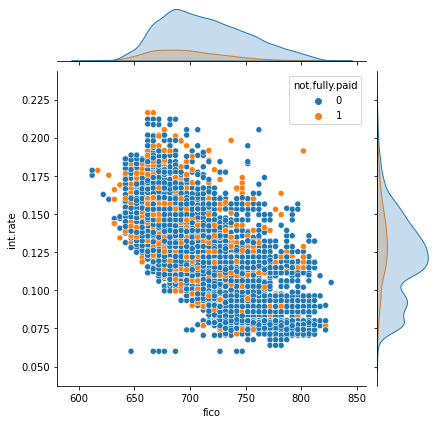

In [9]:
sns.jointplot(x=loans["fico"], y= loans["int.rate"], hue=loans["not.fully.paid"])

<b> Create the following lmplots to see if the trend differed between not.fully.paid and credit.policy. Check the documentation for lmport() if you can't figure out how to seperate it into columns. </b>

<Figure size 792x504 with 0 Axes>

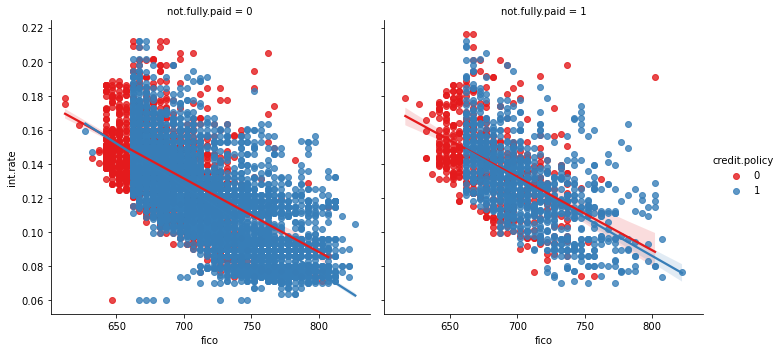

In [10]:
plt.figure(figsize=(11,7))
sns.lmplot(x="fico", y="int.rate", data=loans, hue="credit.policy", col="not.fully.paid", palette="Set1")

<h2> Setting up the Data</h2>

<b> Let's get ready to set up our data for our Random Forest Classification Model!</b>

<b> Check loans.info() again.</b>

In [11]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


<h3> Categorical Features </h3>

- Notice that the features:</br>
    - inq.last.6mths
    - delinq.2yrs
    - pub.rec
    - credit.policy
    - purpose
    
</br> are all categorical.</br>

**That means we need to transform them using dummy variables so sklearn will be to understand them. Let's do this in one clean step using pd.get_dummies.**
    

<b> Create a list of the column names that have categorical features (they are the same ones in the bullet point list). Call this list cat_feats</b>

In [32]:
cat_feats = ["purpose"]

<b> Now use pd.get_dummies(loans,columns=cat_feats,drop_first=True) to create a fixed larger dataframe that has new feature columns with dummy variables. Set this dataframe as final_data</b>

In [33]:
final_data = pd.get_dummies(loans, columns=cat_feats, drop_first=True)

In [34]:
final_data.head(3)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0


In [35]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

## Decision Tree and Random Forest

Now it's time to Learn a Model

### Train Test Split

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [17]:
X = final_data.drop("not.fully.paid", axis=1)

In [18]:
y = final_data["not.fully.paid"]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training a Decision Tree Model

Let's start by training a single decision tree first!

<b> Create an instance of DecisionTreeClassifier called dtree and fit it to the training data</b>

In [20]:
dtree = DecisionTreeClassifier()

In [21]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

## Prediction and Evaluation of Decision Tree

**Create predictions from the test set and create a classification report and a confusion matrix**

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

In [23]:
prediction = dtree.predict(X_test)

In [24]:
print(classification_report(y_test, prediction))
print("\n")
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83      2411
           1       0.18      0.20      0.19       463

    accuracy                           0.73      2874
   macro avg       0.51      0.51      0.51      2874
weighted avg       0.74      0.73      0.73      2874



[[1992  419]
 [ 371   92]]


## Training the Random Forest Model!

**Create an instance of the RandomForestClassifier calss and fit it to our training data from the previous step.**

In [36]:
rfc = RandomForestClassifier(n_estimators=300)

In [37]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

## Predictions and Evaluation

let's predict off the y_test values and evaluate our model.

**Predict the class of not.fully.paid for the X_test data.**

In [38]:
predictions = rfc.predict(X_test)

**Now create a classification report from the results. Do you get anything strange or some sort of warning?**

In [39]:
print(classification_report(y_test, predictions))
print("\n")
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2411
           1       0.32      0.01      0.02       463

    accuracy                           0.84      2874
   macro avg       0.58      0.50      0.47      2874
weighted avg       0.76      0.84      0.77      2874



[[2398   13]
 [ 457    6]]


#Well Done!